# Changes and Impacts of Public Opinions on Electric Vehicles in US


##### DIGHUM 101 Project by Jenny Wang

## Introduction

Along with rapid technological advancements, more and more renewable energies are discovered and applied to different fields to pursue sustainable development on the earth. When people come to aware of the environmental harm led by traditional fossil-fueled vehicles, the electric vehicle soon becomes one of the feasible solutions to lessen such pollution. Governmental and institutional policies then came out, encouraging the production and use of these innovative products. Shortly, as some renowned technology companies in the automotive industry rose to fame, electric vehicles gradually gained popularity among the public throughout the years and have become a revolutionary symbol of the decade. Nevertheless, the endorsements of electric vehicles always come with continuous criticisms and misconceptions. The problems of battery safety, high upfront cost, and limited infrastructure have brought excessive concerns to this novel tool that magnify its defects, hindering the promotion of energy-efficient vehicles. Therefore, learning about the public opinions of electric vehicles and their impacts on the trend of production and consumption is essential to gain insight into the current energy sector and predict the prospect of renewable energy in the field. 



## Research Question
To address the impact of public opinions on the acceptance of electric vehicles and their subsequent market and environmental effects under the promoting governmental policies, this notebook collects institutional data, professional research and private views, and examine the relationship between the viewpoints of different sectors and the statistics on electric vehicle sales. 

## Data Source

Governmental website: Alternative Fuels Data Center

Professional research: "Understanding changes in electric vehicle policies in the U.S. states", Transport Policy

Private views: Questions and answers from Quora and Reddit

Overall internet searching exposure: Google
    

## Methods

1. Do data cleaning for all sources
2. Analyze the impacts of public opinions from the qualitative and quantitative sides. Using the EV sales as a statistical indication of public opinion; and taking the textual descriptions as the informational representation. 
3. Use visualizations and data modeling techniques. 
4. Find patterns and relationship between the datasets, especially the trends of opinions, sellings, and other factors throughout time.

In [1]:
# import all basic libraries and functions

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from string import punctuation
from collections import Counter
from nltk.corpus import stopwords
import os
os.getcwd()

'/Users/jenny/Public-Opinions-on-Electric-Vehicles-in-US'

## Statistical Analysis on Governmental Regulations

In [2]:
# load authoritative data from governmental archieves

law = pd.read_csv("laws_and_incentives.csv")
law.describe()

,Law Id,Sequence Number
count,442.000000,440.000000
mean,11454.742081,62.436364
std,2411.424618,48.339635
min,288.000000,2.000000
25%,11615.000000,25.000000
50%,12322.500000,52.500000
75%,12788.750000,90.000000
max,13209.000000,263.000000


In [3]:
law.head(8)

,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Sequence Number,Type,Agency,Significant Update Date,Expired Date,Archived Date,Repealed Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories,References
0,288,US,Clean Cities Coalition Network,The mission of Clean Cities Coalition Network ...,NaN,NaN,False,21.0,Programs,U.S. Department of Energy,NaN,NaN,NaN,NaN,NaN,AFTMKTCONV|BIOD|ETH|ELEC|EFFEC|HEV|HY|IR|NG|NE...,GNT|OTHER,NaN,STATION|AFP|PURCH|MAN|FLEET|GOV|IND,NaN
1,386,US,High Occupancy Vehicle (HOV) Lane Exemption,States are allowed to exempt certified alterna...,2005-08-10 00:00:00 UTC,2015-12-04 00:00:00 UTC,False,59.0,Laws and Regulations,U.S. Department of Transportation,2015-12-14 22:09:37 UTC,NaN,NaN,NaN,NaN,BIOD|ETH|ELEC|EFFEC|HY|NG|OTHER|PHEV|LPG,NaN,DREST,IND,http://www.gpo.gov/fdsys/|http://thomas.loc.go...
2,388,US,Aftermarket Alternative Fuel Vehicle (AFV) Con...,Conventional original equipment manufacturer v...,2011-04-08 00:00:00 UTC,2011-03-30 00:00:00 UTC,False,37.0,Laws and Regulations,U.S. Environmental Protection Agency,NaN,NaN,NaN,NaN,NaN,AFTMKTCONV|ETH|ELEC|HEV|NG|PHEV|LPG,NaN,AIRQEMISSIONS,MAN|FLEET|GOV|IND,http://www.gpo.gov/fdsys/
3,409,US,Electric Vehicle (EV) and Fuel Cell Electric V...,The Inflation Reduction Act of 2022 (Public La...,2008-10-03 00:00:00 UTC,2022-08-16 00:00:00 UTC,False,18.0,Incentives,U.S. Internal Revenue Service,2022-09-07 14:25:19 UTC,2033-01-01 00:00:00 UTC,NaN,NaN,NaN,ELEC|HY|PHEV,TAX,NaN,FLEET|IND,https://www.congress.gov/112/plaws/publ240/PLA...
4,4178,AZ,Zero Emission Vehicle Emissions Test Exemption,Electric vehicles registered in Arizona are no...,2016-01-01 00:00:00 UTC,NaN,False,42.0,State Incentives,NaN,2015-05-13 18:37:27 UTC,NaN,NaN,NaN,NaN,ELEC|HY,EXEM,NaN,FLEET|GOV|IND,https://www.azleg.gov/ARStitle/
5,4179,AZ,Reduced Alternative Fuel Vehicle (AFV) License...,The vehicle license tax for an AFV registered ...,2018-04-25 00:00:00 UTC,2019-06-07 00:00:00 UTC,False,30.0,State Incentives,NaN,2019-06-28 23:33:14 UTC,NaN,NaN,NaN,NaN,ELEC|HY|NG|PHEV|LPG,TAX,NaN,FLEET|GOV|IND,https://www.azleg.gov/arstitle/|https://www.az...
6,4241,CA,Electric Vehicle (EV) Charging Rate Reduction ...,The Sacramento Municipal Utility District (SMU...,NaN,NaN,False,149.0,Utility/Private Incentives,NaN,2018-11-14 16:18:22 UTC,NaN,NaN,NaN,NaN,ELEC|PHEV,OTHER,NaN,IND,NaN
7,4272,CO,Alternative Fuel Vehicle (AFV) Weight Exemption,Gross vehicle weight rating limits for AFVs ar...,2016-05-04 00:00:00 UTC,NaN,False,35.0,State Incentives,NaN,2016-07-12 17:14:47 UTC,NaN,NaN,NaN,NaN,AFTMKTCONV|ELEC|HY|NG|PHEV|LPG,EXEM,NaN,FLEET|GOV|IND,http://tornado.state.co.us/gov_dir/leg_dir/oll...


In [4]:
# tidy up and select the most useful information

State = law.groupby("State").count().sort_values("Law Id", ascending = False).head(5).index.values
Incentive_Categories = law.groupby("Incentive Categories").count().sort_values("Law Id", ascending = False).head(5).index.values
Type = law.groupby("Type").count().sort_values("Law Id", ascending = False).head(5).index.values
Technology_Categories = law.groupby("Technology Categories").count().sort_values("Law Id", ascending = False).head(5).index.values

In [5]:
# the top 5 of the categories

top_5 = pd.DataFrame({'State': State, 'Incentive_Categories': Incentive_Categories, 'Type': Type
                   , 'Technology_Categories': Technology_Categories})
top_5

,State,Incentive_Categories,Type,Technology_Categories
0,CA,RBATE,Utility/Private Incentives,ELEC|PHEV
1,WA,OTHER,Laws and Regulations,ELEC
2,CO,EXEM,State Incentives,ELEC|HY|PHEV
3,MD,TOU,Incentives,ELEC|HEV|PHEV
4,AZ,GNT,Programs,BIOD|ETH|ELEC|HY|NG|PHEV|LPG


### Finding
1. 4 out of 5 states that enact most laws are from the west side of the country.
2. The most laws government has enacted are about the rebate and private incentives of electric vehicles.

## A positive correlation between numbers of regulations vs. numbers of electric vehicles?

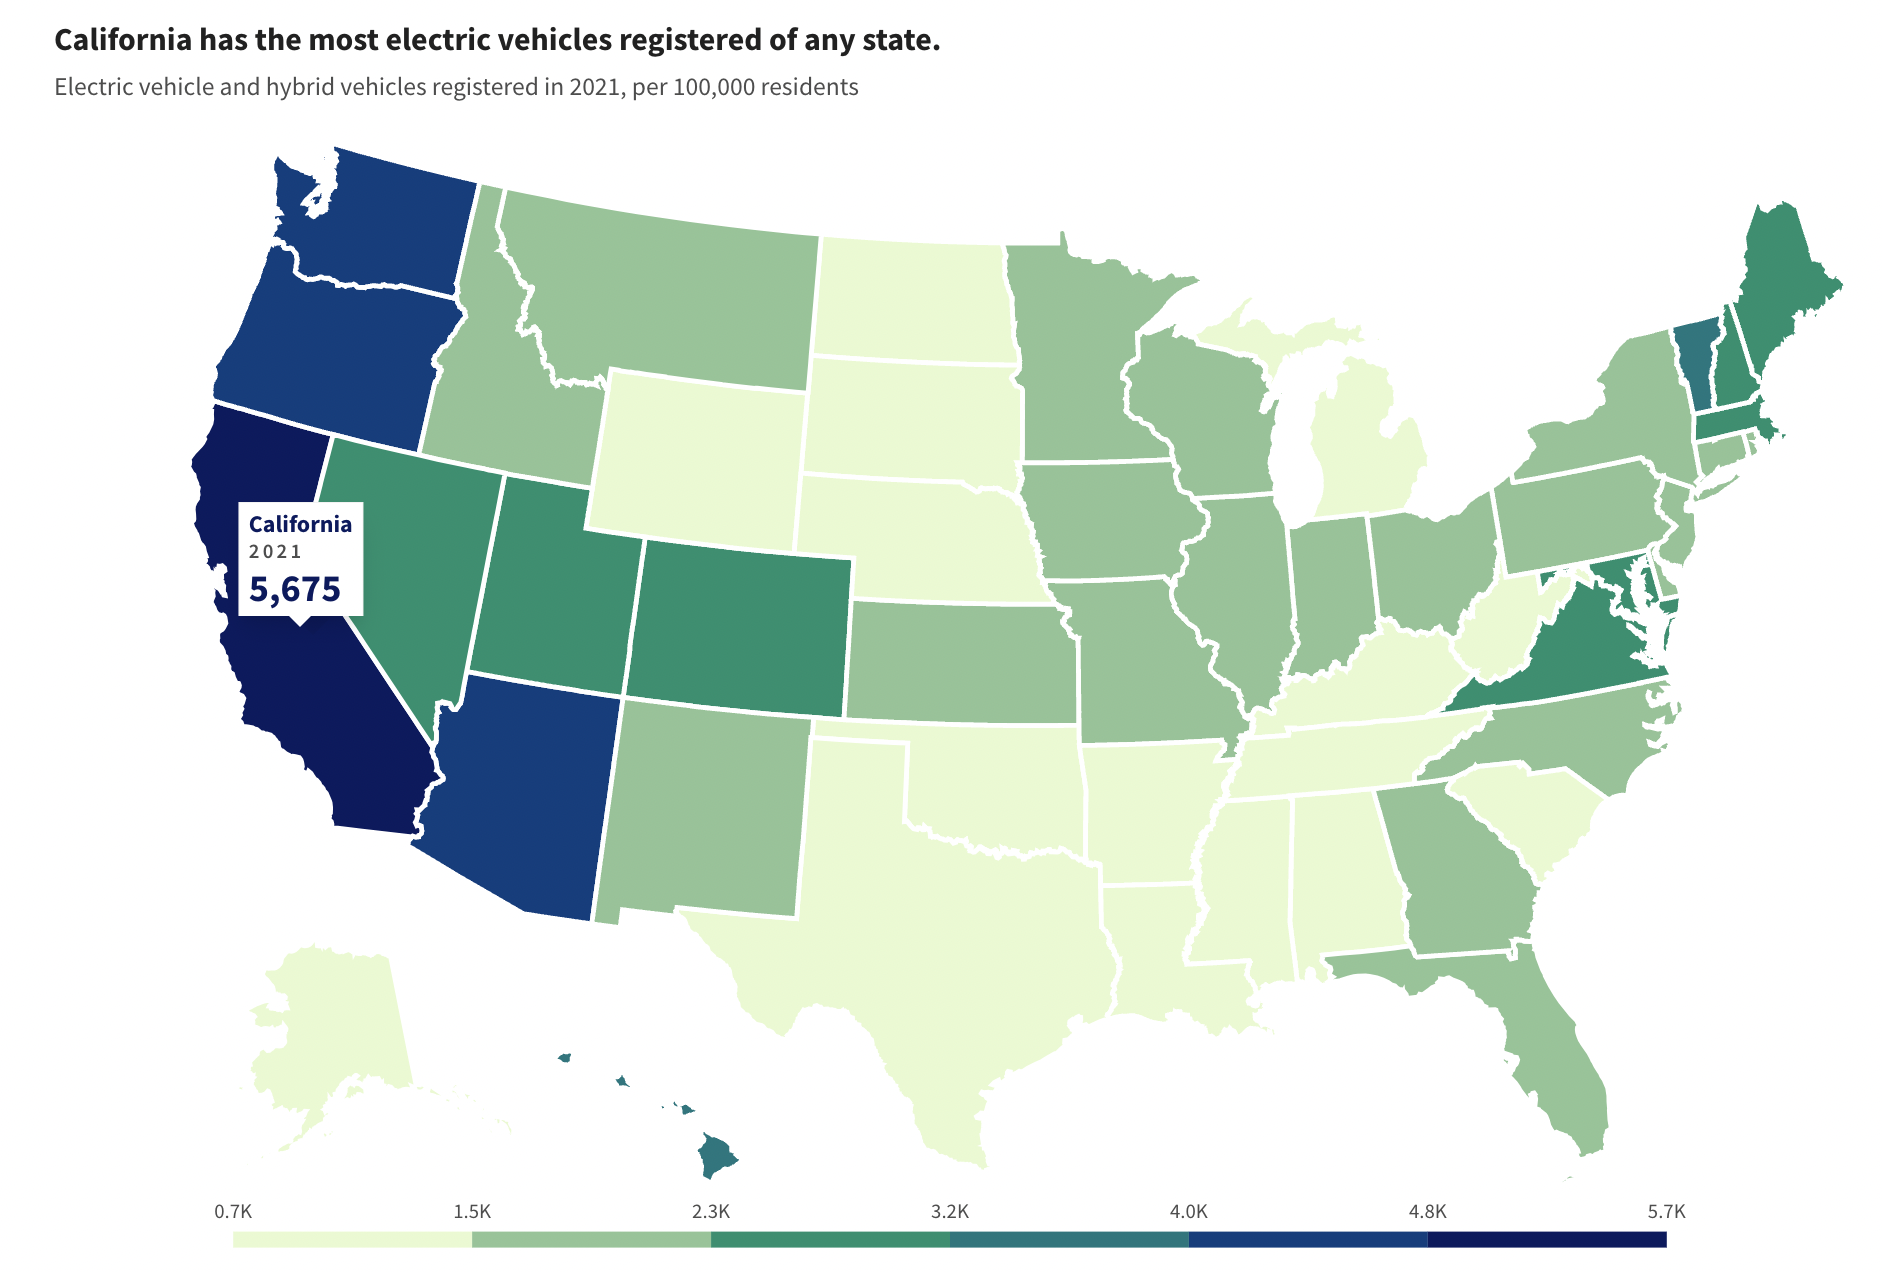

In [6]:
from PIL import Image
Image.open("map.png")

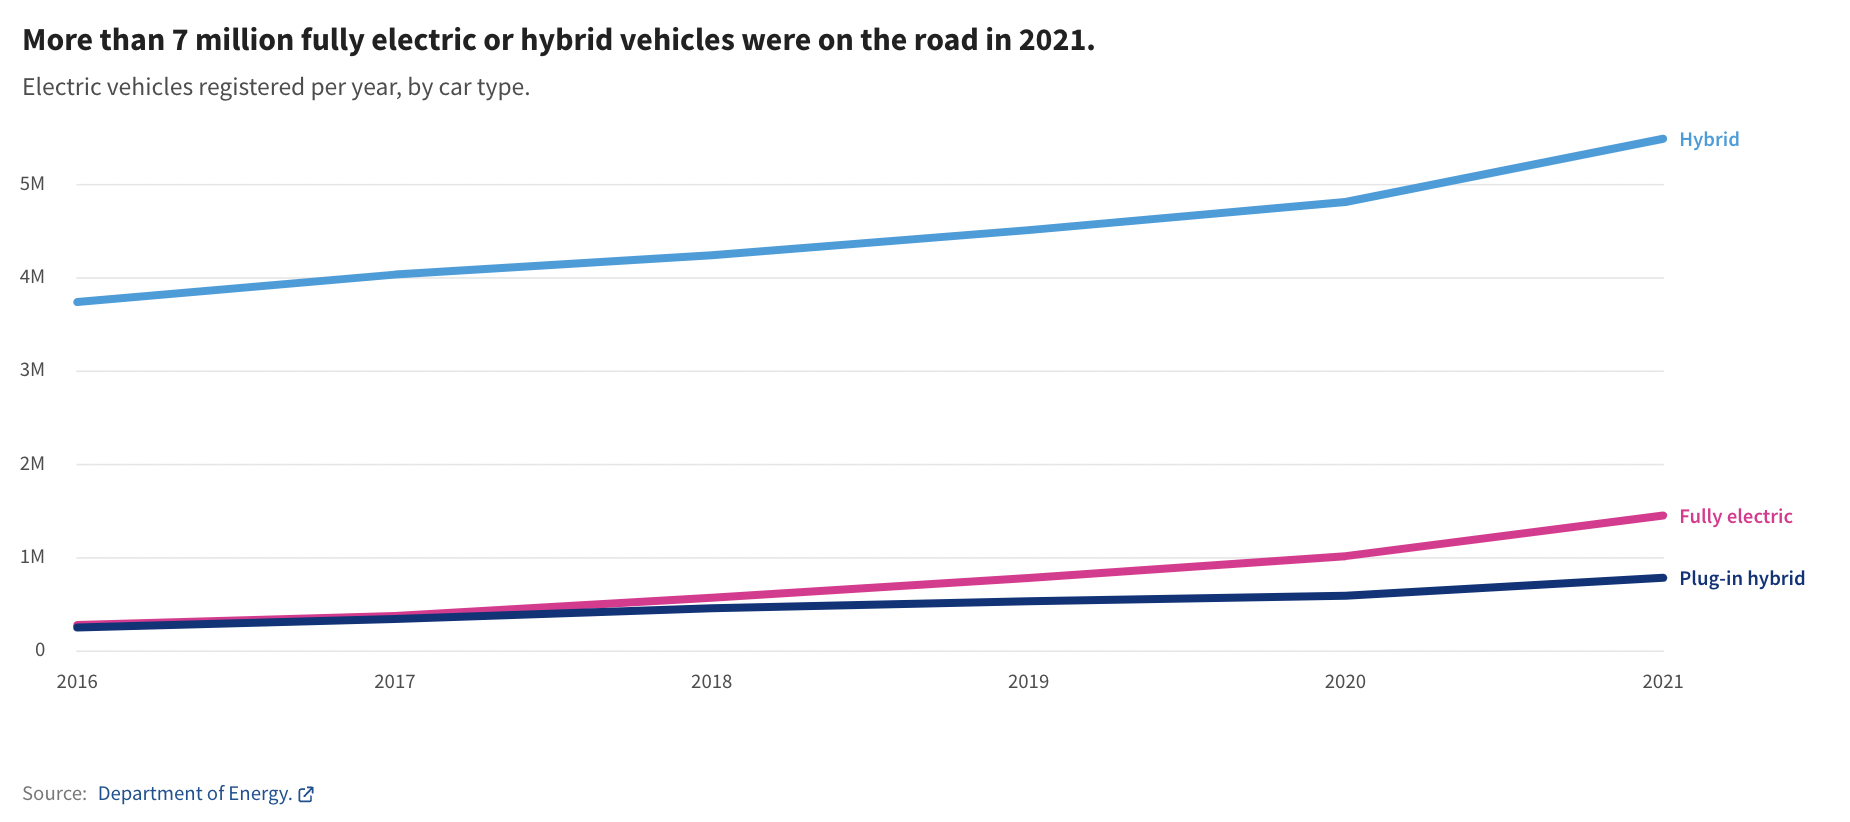

In [7]:
Image.open("type.png")

## How does the number of processed regulations change over the years?

In [8]:
# Convert the "date" of the laws to the unit "year" in the data frame 
# so that it is easier for us to analyze the information

year_law = law.copy()
year_law = year_law[["Enacted Date","Amended Date"]].dropna()
year_law["Enacted Year"] = year_law["Enacted Date"].str.split("-").str[0].astype(int)
year_law["Amended Year"] = year_law["Amended Date"].str.split("-").str[0].astype(int)

In [9]:
year_law.head()

,Enacted Date,Amended Date,Enacted Year,Amended Year
1,2005-08-10 00:00:00 UTC,2015-12-04 00:00:00 UTC,2005,2015
2,2011-04-08 00:00:00 UTC,2011-03-30 00:00:00 UTC,2011,2011
3,2008-10-03 00:00:00 UTC,2022-08-16 00:00:00 UTC,2008,2022
5,2018-04-25 00:00:00 UTC,2019-06-07 00:00:00 UTC,2018,2019
9,2013-04-03 00:00:00 UTC,2014-02-27 00:00:00 UTC,2013,2014


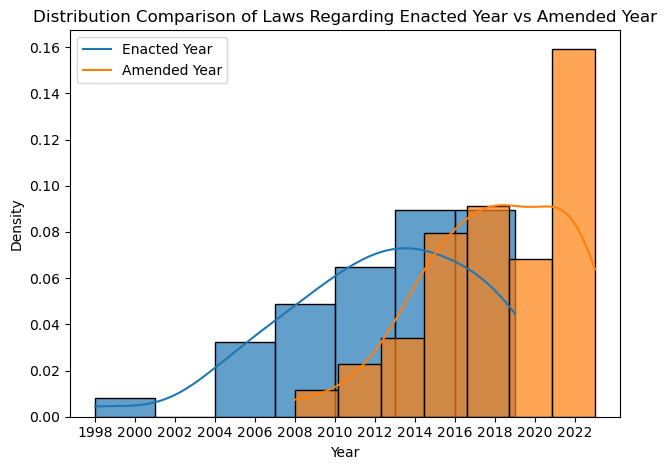

In [10]:
#illustrate the numbers of enacted and amended laws over the years
#and their distributions

sns.histplot(x = 'Enacted Year', data = year_law, stat = 'density', alpha = 0.7, kde = True)
sns.histplot(x = 'Amended Year', data = year_law, stat = 'density', alpha = 0.7, kde = True)
plt.xlabel("Year")
plt.title("Distribution Comparison of Laws Regarding Enacted Year vs Amended Year")
plt.legend(["Enacted Year", "Amended Year"])
plt.xticks(np.arange(1998, 2024, 2))
plt.tight_layout()
plt.show()

### Findings
1. There are almost no new laws enacted after 2018, 2019.
2. Although there is an overall increasing number of laws being processed, there is a decrease number of regulations from 2018-2020.

## Statistical Analysis on Electric Vehicle Sales

In [11]:
# load data of electric vehicle sales

sales = pd.read_csv("IEA-EV-dataEV salesCarsHistorical.csv")
sales.describe()

,year,value
count,834.000000,8.340000e+02
mean,2016.579137,8.141432e+04
std,3.511476,4.072362e+05
min,2010.000000,1.000000e+00
25%,2014.000000,3.400000e+02
50%,2017.000000,3.100000e+03
75%,2020.000000,2.300000e+04
max,2022.000000,7.300000e+06


In [12]:
sales.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190


In [13]:
# select the EV sales in the US and the total sale of the world

us_sales = sales[sales['region'] == 'USA'].sort_values("year", ascending = False)
world_sales = sales[sales['region'] == 'World'].sort_values("year", ascending = False)

In [14]:
us_sales.head()

,region,category,parameter,mode,powertrain,year,unit,value
807,USA,Historical,EV sales,Cars,PHEV,2022,Vehicles,190000
806,USA,Historical,EV sales,Cars,BEV,2022,Vehicles,800000
805,USA,Historical,EV sales,Cars,BEV,2021,Vehicles,470000
804,USA,Historical,EV sales,Cars,PHEV,2021,Vehicles,160000
803,USA,Historical,EV sales,Cars,PHEV,2020,Vehicles,64000


### Finding: Graphs may suggest a positive correlation between number of regulations and EV sales. (2018-2020)

Text(0, 0.5, 'Value')

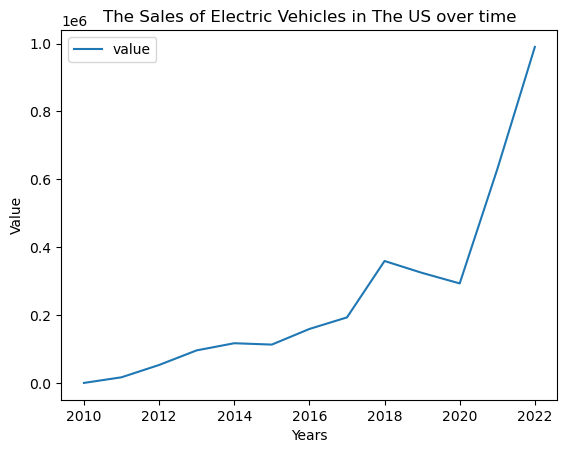

In [15]:
# find the trend of EV sales in the US over time

us_stat = us_sales[['year', 'value']].groupby('year').sum()
us_stat.plot.line()
plt.title('The Sales of Electric Vehicles in The US over time')
plt.xlabel('Years')
plt.ylabel('Value')

<Axes: xlabel='year'>

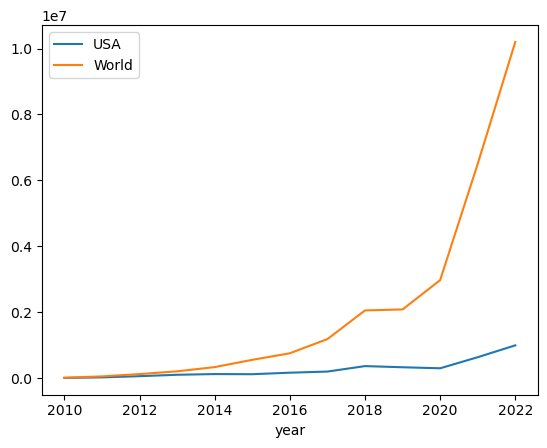

In [16]:
# compare the sale trends 

world_stat = world_sales[['year', 'value']].groupby('year').sum()
sale_stat = pd.DataFrame({'USA': us_stat['value'],'World': world_stat['value']})
sale_stat.plot.line()

### Findings
1. The decrease of law regulations in the US between 2018-2020 has resulted in a decrease of EV sales, but does not affect the overall sales in the world.
2. The EV sales in the US grows slowly compared to the world overall sales. 

## Qualitative Analysis on Key Words
I want to know the discrepancies of key words around the topic EV in governmental documents and public opinions (Quora in this case). A data training would be helpful, but takes a lot of work to handle the training set, validation set, and test set. So does topic modeling. So I just use visual representations here.

In [17]:
# load the most useful descriptions in government documents
# do basic data processing 

laws_text = law['Text']
laws_text

0      The mission of Clean Cities Coalition Network ...
1      States are allowed to exempt certified alterna...
2      Conventional original equipment manufacturer v...
3      The Inflation Reduction Act of 2022 (Public La...
4      Electric vehicles registered in Arizona are no...
                             ...                        
437    Minnesota Power offers residential customers a...
438    National Grid offers rebates to residential an...
439    Associations in the City of Cambridge may not ...
440    Rocky Mountain Power offers residential custom...
441    An income tax credit is available for 10% of t...
Name: Text, Length: 442, dtype: object

In [18]:
text = ''
for i in np.arange(0, 441):
    text += laws_text[i]
for char in punctuation:
    text = text.replace(char, "")
text = text.lower().split()
no_stops = []
for word in text:
    if word not in stopwords.words('english'):
        no_stops.append(word)
print(no_stops)

['mission', 'clean', 'cities', 'coalition', 'network', 'foster', 'economic', 'environmental', 'energy', 'security', 'united', 'states', 'working', 'locally', 'advance', 'affordable', 'domestic', 'transportation', 'fuels', 'technologies', 'nearly', '100', 'volunteer', 'coalitions', 'carry', 'mission', 'developing', 'publicprivate', 'partnerships', 'promote', 'alternative', 'renewable', 'fuels', 'idlereduction', 'measures', 'fuel', 'economy', 'improvements', 'emerging', 'transportation', 'technologies', 'clean', 'cities', 'coalition', 'network', 'provides', 'information', 'financial', 'opportunities', 'coordinates', 'technical', 'assistance', 'projects', 'updates', 'maintains', 'databases', 'websites', 'publishes', 'technical', 'informational', 'materials', 'information', 'see', 'clean', 'cities', 'coalition', 'networkhttpscleancitiesenergygov', 'website', 'states', 'allowed', 'exempt', 'certified', 'alternative', 'fuel', 'vehicles', 'afvs', 'electric', 'vehicles', 'evs', 'hov', 'lane', 

In [19]:
# the most frequent words in the document description

freq = Counter(no_stops)
law_freq = freq.most_common(20)
df_freq = pd.DataFrame(law_freq, columns=['Word', 'Frequency'])
df_freq.head()

,Word,Frequency
0,ev,657
1,charging,538
2,vehicle,355
3,information,330
4,website,320


Text(0.5, 1.0, 'Most frequent words in the government descriptions')

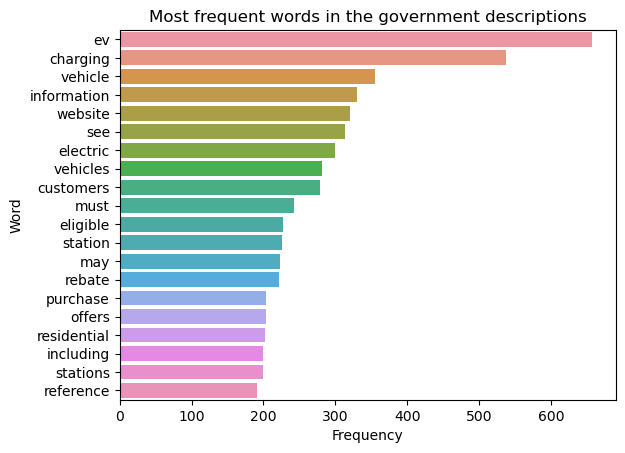

In [20]:
sns.barplot(x = "Frequency",
            y = "Word",
            data = df_freq);
plt.title('Most frequent words in the government descriptions')

### Notes

I tried to web scrape from Quora using the following ways, but unable to extract the answers. 

import requests
from bs4 import BeautifulSoup
!pip install beautifulsoup4

r = requests.get('https://www.quora.com/What-is-your-opinion-on-electric-vehicles')
source = r.text
source

soup = BeautifulSoup(source, 'html.parser')
print(type(soup))

df = pd.DataFrame({'question': [], 'answers':[]})
question = soup.find('title')
answers = soup.find_all('div', attrs={'class': 'ui_qtext_expanded'})

for answer in answers:
    df = df.append({'question': question.text,'answers': answer.text}, ignore_index=True)
    
answer_elements = soup.find_all('div')
for element in answer_elements:
    answer_text = element.get_text(strip=True)

In [21]:
# eventually, I use an online quora scraper to load the questions related to electric vehicles

quora_question = pd.read_csv('dataset_quora-scraper.csv')
quora_question

,answerCount,creationTime,id,originalTitle,qid,title,url
0,1808,2015-09-11T05:07:39.863Z,UXVlc3Rpb25AMDo1MjMwODQ3,"{""sections"": [{""spans"": [{""text"": ""Would you s...",5230847,Would you share some of your own creative work...,https://www.quora.com/Would-you-share-some-of-...
1,1828,2014-01-11T17:18:47.535Z,UXVlc3Rpb25AMDoxNTU0MjM4,"{""sections"": [{""spans"": [{""text"": ""Who was the...",1554238,Who was the all time best President of the Uni...,https://www.quora.com/Who-was-the-all-time-bes...
2,1214,2014-06-13T19:10:55.117Z,UXVlc3Rpb25AMDoyMDQ1MDEw,"{""sections"": [{""spans"": [{""text"": ""Why did God...",2045010,Why did God create us?,https://www.quora.com/Why-did-God-create-us
3,739,2013-01-10T04:56:17.466Z,UXVlc3Rpb25AMDo5MjAwMzQ=,"{""sections"": [{""spans"": [{""text"": ""What are so...",920034,What are some things films have led us to beli...,https://www.quora.com/What-are-some-things-fil...
4,1614,2017-01-23T05:24:36.943Z,UXVlc3Rpb25AMDoxMjQ1MDY5Mg==,"{""sections"": [{""spans"": [{""text"": ""How do I ge...",12450692,"How do I get over the fact that I'm ugly, shor...",https://www.quora.com/How-do-I-get-over-the-fa...
...,...,...,...,...,...,...,...
339,32,2013-07-18T16:54:53.720Z,UXVlc3Rpb25AMDoxMjMzMjk4,"{""sections"": [{""spans"": [{""text"": ""Is it bette...",1233298,Is it better to do a MS in US or a MS in Germany?,https://www.quora.com/Is-it-better-to-do-a-MS-...
340,114,2014-02-14T17:48:55.208Z,UXVlc3Rpb25AMDoxNjM2MjEx,"{""sections"": [{""spans"": [{""text"": ""What is the...",1636211,What is the relationship like between the Unit...,https://www.quora.com/What-is-the-relationship...
341,191,2019-04-21T18:27:16.076Z,UXVlc3Rpb25AMDo0NjQ0MTUzMA==,"{""sections"": [{""spans"": [{""text"": ""Is Tiktok b...",46441530,Is Tiktok banned in the USA?,https://www.quora.com/Is-Tiktok-banned-in-the-USA
342,99,2018-06-01T13:50:50.763Z,UXVlc3Rpb25AMDoyODk4MTkzMQ==,"{""sections"": [{""spans"": [{""text"": ""What are th...",28981931,What are the darkest secrets of elite US unive...,https://www.quora.com/What-are-the-darkest-sec...


In [22]:
# basic data processing 

question = quora_question['title']
question

0      Would you share some of your own creative work...
1      Who was the all time best President of the Uni...
2                                 Why did God create us?
3      What are some things films have led us to beli...
4      How do I get over the fact that I'm ugly, shor...
                             ...                        
339    Is it better to do a MS in US or a MS in Germany?
340    What is the relationship like between the Unit...
341                         Is Tiktok banned in the USA?
342    What are the darkest secrets of elite US unive...
343    I don’t want to get the vaccine. But If I don’...
Name: title, Length: 344, dtype: object

In [23]:
q_text = ''
for i in np.arange(0, 343):
    q_text += question[i]
for char in punctuation:
    q_text = q_text.replace(char, "")
q_text = q_text.lower().split()
print(q_text)
final = []
for word in q_text:
    if word not in stopwords.words('english'):
        final.append(word)
print(final)

['would', 'you', 'share', 'some', 'of', 'your', 'own', 'creative', 'work', 'with', 'uswho', 'was', 'the', 'all', 'time', 'best', 'president', 'of', 'the', 'united', 'states', 'of', 'americawhy', 'did', 'god', 'create', 'uswhat', 'are', 'some', 'things', 'films', 'have', 'led', 'us', 'to', 'believe', 'that', 'are', 'actually', 'not', 'truehow', 'do', 'i', 'get', 'over', 'the', 'fact', 'that', 'im', 'ugly', 'short', 'and', 'socially', 'awkwardwhats', 'something', 'that', 'is', 'common', 'knowledge', 'at', 'your', 'workplace', 'but', 'would', 'be', 'mindblowing', 'to', 'the', 'rest', 'of', 'usim', 'a', 'us', 'citizen', 'what', 'is', 'it', 'like', 'to', 'live', 'in', 'a', 'country', 'that', 'doesnt', 'have', 'the', 'same', 'level', 'of', 'freedom', 'as', 'the', 'united', 'states', 'does', 'are', 'you', 'aware', 'of', 'the', 'disparity', 'between', 'your', 'country', 'and', 'the', 'usaare', 'there', 'us', 'soldiers', 'based', 'in', 'nigeria', 'nowwhat', 'are', 'the', 'biggest', 'lies', 'tha

['would', 'share', 'creative', 'work', 'uswho', 'time', 'best', 'president', 'united', 'states', 'americawhy', 'god', 'create', 'uswhat', 'things', 'films', 'led', 'us', 'believe', 'actually', 'truehow', 'get', 'fact', 'im', 'ugly', 'short', 'socially', 'awkwardwhats', 'something', 'common', 'knowledge', 'workplace', 'would', 'mindblowing', 'rest', 'usim', 'us', 'citizen', 'like', 'live', 'country', 'doesnt', 'level', 'freedom', 'united', 'states', 'aware', 'disparity', 'country', 'usaare', 'us', 'soldiers', 'based', 'nigeria', 'nowwhat', 'biggest', 'lies', 'society', 'tells', 'uswhy', 'united', 'states', 'lose', 'vietnam', 'warwhat', 'opinion', 'electric', 'vehicleswhat', 'review', 'electric', 'carswhat', 'opinion', 'decision', 'austrian', 'government', 'reward', 'use', 'electric', 'vehicles', 'like', 'tesla', 'carswhat', 'opinion', 'states', 'charging', 'electric', 'vehicle', 'owners', 'special', 'tax', 'make', 'gasoline', 'road', 'taxes', 'dont', 'payin', 'opinion', 'biggest', 'chal

In [24]:
# the most frequent words in related questions in Quora 

frequency = Counter(final)
q_freq = frequency.most_common(20)
df_qfreq = pd.DataFrame(q_freq, columns=['Word', 'Frequency'])
df_qfreq.head()

,Word,Frequency
0,electric,157
1,opinion,145
2,us,141
3,vehicles,80
4,vehicle,62


Text(0.5, 1.0, 'Most frequent words in related questions in Quora ')

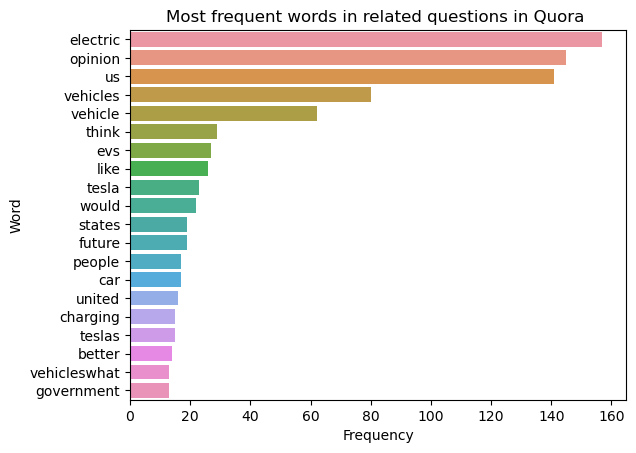

In [25]:
sns.barplot(x = "Frequency",
            y = "Word",
            data = df_qfreq);
plt.title('Most frequent words in related questions in Quora ')

## Finding
The most common words in Quora questions are more subjective than the descriptive words in governmental documents, with more people centered terms, such as "people", "us". They also express an anticipation of EVs, with terms like "would", "future", "better". No obvious negative opinions can be sensed from the common words.

## Text Sentiment Analysis on Quora and Reddit Answers

In [26]:
# load answers to a dataframe
# manually copied about 100 answers in total, with about 50 answers from each social platform

quora_answer = pd.read_csv('Answers.csv')
quora_answer

,Quora Answers,Reddit Answers
0,\nSearch Quora\nProfile photo for Mingyi Wang\...,BellyScratchFTW\n•\n3 mo. ago\nI currently lik...


In [27]:
# combined all answers from 2 social platforms 

answer = quora_answer["Quora Answers"][0] + quora_answer["Reddit Answers"][0]
answer

'\nSearch Quora\nProfile photo for Mingyi Wang\nWhat is your opinion on electric vehicles?\nAd by Online Shopping Tools\nAmericans Should Think Twice Before Buying From These 2 Stores.\nIt\'s a bigger problem than you might think (the ugly truth).\nSort\nProfile photo for Eric\'s Car Care\nEric\'s Car Care\n · \nFollow\nLives in Rice Village (1970–present)Feb 12\nBoth electric and petrol vehicles have their pros and cons but in my opinion electric vehicles are more convenient and I think they are a better option. Let me list down some keypoints that show how they are a better option.\n\n\nElectric vehicles use electricity to power their engines instead of gasoline or diesel.\nThey produce zero emissions while driving, making them a more environmentally friendly alternative to traditional vehicles.\nThe cost of owning and operating an electric vehicle is generally lower than a gas-powered vehicle.\nThey offer a quiet and smooth driving experience due to the absence\n… (more)\nSponsored 

In [28]:
for char in punctuation:
    answer = answer.replace(char, "")
answer = answer.lower().split()
a_final = []
for word in answer:
    if word not in stopwords.words('english'):
        a_final.append(word)
print(a_final)

['search', 'quora', 'profile', 'photo', 'mingyi', 'wang', 'opinion', 'electric', 'vehicles', 'ad', 'online', 'shopping', 'tools', 'americans', 'think', 'twice', 'buying', '2', 'stores', 'bigger', 'problem', 'might', 'think', 'ugly', 'truth', 'sort', 'profile', 'photo', 'erics', 'car', 'care', 'erics', 'car', 'care', '·', 'follow', 'lives', 'rice', 'village', '1970–presentfeb', '12', 'electric', 'petrol', 'vehicles', 'pros', 'cons', 'opinion', 'electric', 'vehicles', 'convenient', 'think', 'better', 'option', 'let', 'list', 'keypoints', 'show', 'better', 'option', 'electric', 'vehicles', 'use', 'electricity', 'power', 'engines', 'instead', 'gasoline', 'diesel', 'produce', 'zero', 'emissions', 'driving', 'making', 'environmentally', 'friendly', 'alternative', 'traditional', 'vehicles', 'cost', 'owning', 'operating', 'electric', 'vehicle', 'generally', 'lower', 'gaspowered', 'vehicle', 'offer', 'quiet', 'smooth', 'driving', 'experience', 'due', 'absence', '…', 'sponsored', 'financebuzz', 

In [29]:
a_frequency = Counter(a_final)
print(a_frequency.most_common(50))

[('electric', 89), ('reply', 79), ('share', 76), ('vehicles', 68), ('profile', 55), ('photo', 55), ('·', 54), ('follow', 54), ('3', 50), ('car', 45), ('ago', 41), ('cars', 40), ('evs', 40), ('•', 39), ('mo', 39), ('upvote', 38), ('downvote', 38), ('gas', 37), ('battery', 24), ('one', 23), ('good', 22), ('1', 20), ('need', 20), ('batteries', 20), ('vehicle', 19), ('think', 18), ('much', 18), ('better', 17), ('still', 17), ('get', 17), ('emissions', 15), ('years', 15), ('long', 15), ('charge', 14), ('make', 14), ('drive', 14), ('like', 14), ('use', 13), ('cost', 13), ('also', 13), ('would', 13), ('charging', 13), ('dont', 13), ('power', 12), ('gasoline', 12), ('ev', 12), ('costs', 12), ('environment', 12), ('opinion', 11), ('2', 11)]


In [30]:
# eleminate some customary stop words from this context 

a_word = []
eliminate_word = ['profile', 'upvote', 'downvote', 'reply', '·', '•', 'mo', '3','share', '1', 
                  'photo', 'follow', 'ago', 'avatar', '2']
for word in a_final:
    if word not in eliminate_word:
        a_word.append(word)
print(a_word)

['search', 'quora', 'mingyi', 'wang', 'opinion', 'electric', 'vehicles', 'ad', 'online', 'shopping', 'tools', 'americans', 'think', 'twice', 'buying', 'stores', 'bigger', 'problem', 'might', 'think', 'ugly', 'truth', 'sort', 'erics', 'car', 'care', 'erics', 'car', 'care', 'lives', 'rice', 'village', '1970–presentfeb', '12', 'electric', 'petrol', 'vehicles', 'pros', 'cons', 'opinion', 'electric', 'vehicles', 'convenient', 'think', 'better', 'option', 'let', 'list', 'keypoints', 'show', 'better', 'option', 'electric', 'vehicles', 'use', 'electricity', 'power', 'engines', 'instead', 'gasoline', 'diesel', 'produce', 'zero', 'emissions', 'driving', 'making', 'environmentally', 'friendly', 'alternative', 'traditional', 'vehicles', 'cost', 'owning', 'operating', 'electric', 'vehicle', 'generally', 'lower', 'gaspowered', 'vehicle', 'offer', 'quiet', 'smooth', 'driving', 'experience', 'due', 'absence', '…', 'sponsored', 'financebuzz', 'barely', 'scraping', 'financially', 'heres', '8', 'things',

In [31]:
# due to lack of sentimental words, I choose the top 100 most frequent words
# process the data and store into a data frame as tokens

an_frequency = Counter(a_word)
analysis = an_frequency.most_common(100)
print(analysis)
df_a = pd.DataFrame(analysis, columns=['token', 'freq'])
df_a.head()

[('electric', 89), ('vehicles', 68), ('car', 45), ('cars', 40), ('evs', 40), ('gas', 37), ('battery', 24), ('one', 23), ('good', 22), ('need', 20), ('batteries', 20), ('vehicle', 19), ('think', 18), ('much', 18), ('better', 17), ('still', 17), ('get', 17), ('emissions', 15), ('years', 15), ('long', 15), ('charge', 14), ('make', 14), ('drive', 14), ('like', 14), ('use', 13), ('cost', 13), ('also', 13), ('would', 13), ('charging', 13), ('dont', 13), ('power', 12), ('gasoline', 12), ('ev', 12), ('costs', 12), ('environment', 12), ('opinion', 11), ('electricity', 11), ('former', 11), ('range', 11), ('people', 11), ('future', 11), ('even', 11), ('fossil', 11), ('lower', 10), ('well', 10), ('maintenance', 10), ('new', 10), ('fuels', 10), ('engine', 10), ('many', 10), ('however', 10), ('less', 10), ('ice', 10), ('fuel', 9), ('it’s', 9), ('work', 9), ('infrastructure', 9), ('produce', 8), ('zero', 8), ('traditional', 8), ('due', 8), ('second', 8), ('first', 8), ('needs', 8), ('expensive', 8), 

,token,freq
0,electric,89
1,vehicles,68
2,car,45
3,cars,40
4,evs,40


## 1: VADER Sentiment Analysis with NLTK
VADER(Valence Aware Dictionary and sEntiment Reasoner) is a tool for quantifying the sentiment of a word. Each word in each dataset was reviewed and rated on a scale of -4 (extremely negative) to 4 (extremely positive) by at least 10 trained individuals from Amazon Mechanical Turk.

In [32]:
# open the vader lexicon text file

print(''.join(open("vader_lexicon.txt").readlines()))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]
(*	1.1	1.13578	[2, 1, 1, -1, 1, 2, 2, -1, 2, 2]
(-%	-0.7	1.26886	[-1, 2, 0, -1, -1, -2, 0, 0, -3, -1]
(-*	1.3	1.26886	[4, 1, 2, 0, 2, -1, 1, 2, 1, 1]
(-:	1.6	0.8	[2, 2, 1, 3, 1, 1, 1, 3, 1, 1]
(-:0	2.8	0.87178	[3, 2, 3, 4, 3, 2, 3, 1, 4, 3]
(-:<	-0.4	2.15407	[-3, 3, -1, -1, 2, -1, -2, 3, -3, -1]
(-:o	1.5	0.67082	[3, 1, 1, 2, 2, 2, 1, 1, 1, 1]
(-:O	1.5	0.67082	[3, 1, 1, 2, 2, 2, 1, 1, 1, 1]
(-:{	-0.1	1.57797	[-2, -3, 1, -2, 1, 1, 0, 0, 2, 1]
(-:|>*	1.9	0.83066	[3, 2, 2, 1, 0, 2, 

In [33]:
sent = pd.read_csv('vader_lexicon.txt', sep='\t', usecols=[0, 1], header=None,names=['token', 'polarity'],index_col='token')
sent.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [34]:
# add polarity to the most common 100 words

df_combined = df_a.join(sent, on = 'token')
df_combined

,token,freq,polarity
0,electric,89,NaN
1,vehicles,68,NaN
2,car,45,NaN
3,cars,40,NaN
4,evs,40,NaN
...,...,...,...
95,air,6,NaN
96,environmental,6,NaN
97,want,6,0.3
98,used,6,NaN


In [35]:
# ignore the tokens that cannot match the lexicon text document
# calculate the mean polarity among the tokens with emotional descriptions

no_points_nans = df_combined[~df_combined['polarity'].isna()]
print(no_points_nans)
sentiment = no_points_nans['polarity'].mean()
sentiment

     token  freq  polarity
8     good    22       1.9
14  better    17       1.9
23    like    14       1.5
43   lower    10      -1.2
44    well    10       1.1
83  energy     7       1.1
91    love     6       3.2
92    save     6       2.2
97    want     6       0.3


1.3333333333333333

In [36]:
# what happens if I fill the NaN with 0 instead of ignoring them?

overall_sent = df_combined['polarity'].fillna(0).mean()
overall_sent

0.12

## Finding: Almost all sentimental words have positive connotations, aligns with poll results.

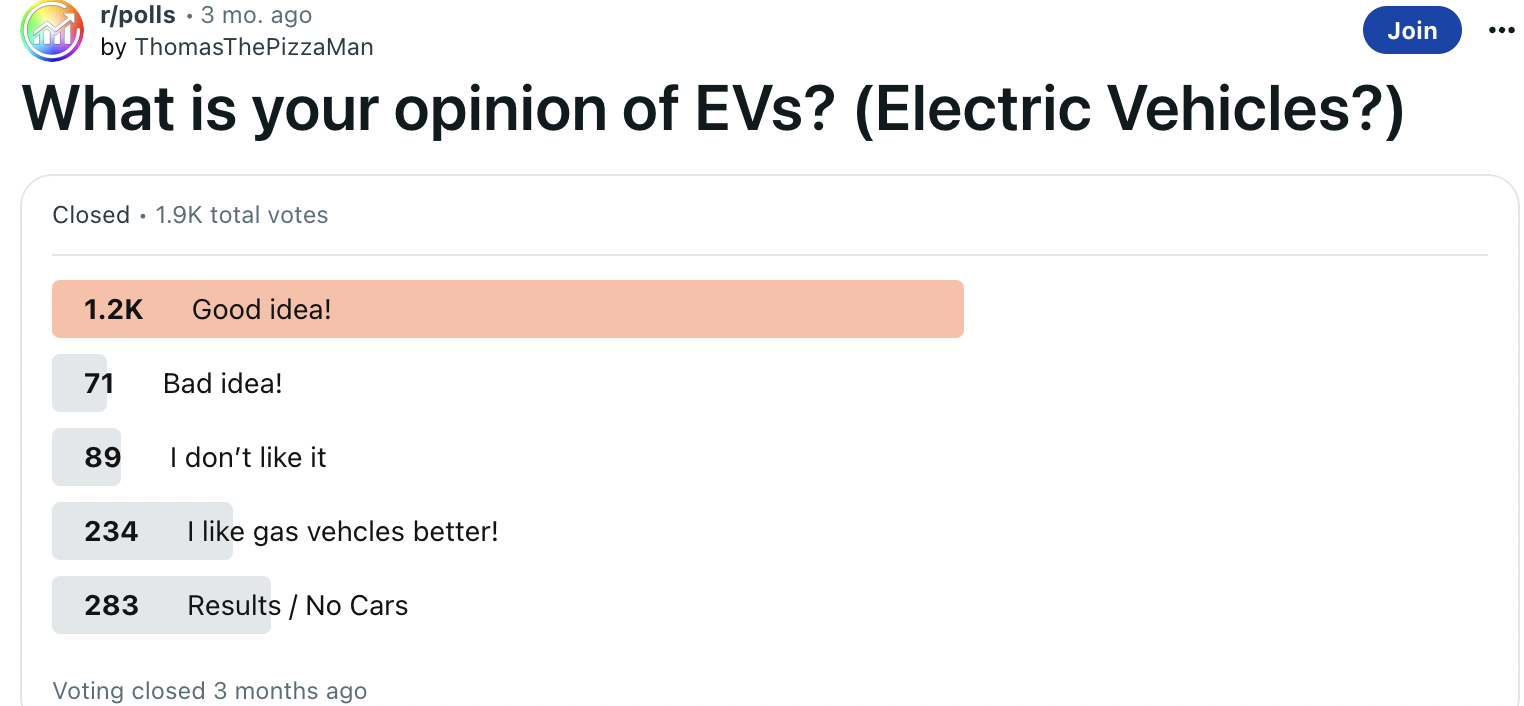

In [37]:
Image.open("vote.png")

## Text Sentiment Analysis on Google Search

In [38]:
# load all related search contents by the online web scraper

google = pd.read_csv('dataset_google-search-scraper.csv')
google

,date,description,displayedUrl,emphasizedKeywords,personalInfo/companyName,personalInfo/jobTitle,personalInfo/location,personalInfo/rawText,position,productInfo/price,...,searchQuery/languageCode,searchQuery/locationUule,searchQuery/page,searchQuery/resultsPerPage,searchQuery/term,searchQuery/type,searchQuery/url,title,type,url
0,NaN,NaN,https://www.nrel.gov › docs,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,1,100,opinions of electric vehicles,SEARCH,http://www.google.com/search?num=100&q=opinion...,Consumer Views on Plug-in Electric Vehicles - ...,organic,https://www.nrel.gov/docs/fy16osti/65279.pdf
1,2021-06-03T12:00:00.000Z,"Jun 3, 2021Roughly two-thirds of Americans (67...",https://www.pewresearch.org › ... › Science Is...,electric cars,NaN,NaN,"Jun 3, 2021 —","Jun 3, 2021 —",2,NaN,...,NaN,NaN,1,100,opinions of electric vehicles,SEARCH,http://www.google.com/search?num=100&q=opinion...,Electric vehicles get mixed reception from Ame...,organic,https://www.pewresearch.org/short-reads/2021/0...
2,2022-07-13T12:00:00.000Z,"Jul 13, 2022AAA finds that consumers have a re...",https://newsroom.aaa.com › 2022/07 › americans...,electric vehicle,NaN,NaN,"Jul 13, 2022 —","Jul 13, 2022 —",3,NaN,...,NaN,NaN,1,100,opinions of electric vehicles,SEARCH,http://www.google.com/search?num=100&q=opinion...,Americans Reveal Fresh Thoughts on Electric Ve...,organic,https://newsroom.aaa.com/2022/07/americans-rev...
3,2022-12-18T12:00:00.000Z,"Dec 18, 2022EVs are prohibitively expensive. T...",https://www.sandiegouniontribune.com › opinion...,EVs,NaN,NaN,"Dec 18, 2022 —","Dec 18, 2022 —",4,NaN,...,NaN,NaN,1,100,opinions of electric vehicles,SEARCH,http://www.google.com/search?num=100&q=opinion...,Opinion: Electric vehicles aren't the panacea ...,organic,https://www.sandiegouniontribune.com/opinion/l...
4,2023-01-18T12:00:00.000Z,"Jan 18, 2023All-electric cars and plug-in elec...",https://www.energysage.com › electric-vehicles...,electric cars | electric cars,NaN,NaN,"Jan 18, 2023 —","Jan 18, 2023 —",5,NaN,...,NaN,NaN,1,100,opinions of electric vehicles,SEARCH,http://www.google.com/search?num=100&q=opinion...,Pros and Cons of Electric Cars,organic,https://www.energysage.com/electric-vehicles/1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,NaN,Get the latest breaking news across the U.S. o...,https://abcnews.go.com › US,U.S.,NaN,NaN,NaN,NaN,94,NaN,...,NaN,NaN,1,100,US,SEARCH,http://www.google.com/search?num=100&q=US,"U.S. News | Latest National News, Videos & Photos",organic,https://abcnews.go.com/US
192,NaN,The National Security Agency/Central Security ...,https://www.nsa.gov,U.S.,NaN,NaN,NaN,NaN,95,NaN,...,NaN,NaN,1,100,US,SEARCH,http://www.google.com/search?num=100&q=US,National Security Agency | Central Security Se...,organic,https://www.nsa.gov/
193,NaN,"Population of the United States: current, hist...",https://www.worldometers.info › us-population,United States,NaN,NaN,NaN,NaN,96,NaN,...,NaN,NaN,1,100,US,SEARCH,http://www.google.com/search?num=100&q=US,United States Population (2023),organic,https://www.worldometers.info/world-population...
194,NaN,NaN,https://www.samsung.com › us,NaN,NaN,NaN,NaN,NaN,97,NaN,...,NaN,NaN,1,100,US,SEARCH,http://www.google.com/search?num=100&q=US,Samsung US | Mobile | TV | Home Electronics | ...,organic,https://www.samsung.com/us/


In [39]:
# select the most useful part for qualitative text analyzing

description = google[['date', 'description', 'title']].dropna()
description["date"] = description["date"].str.split("-").str[0].astype(int)
description

,date,description,title
1,2021,"Jun 3, 2021Roughly two-thirds of Americans (67...",Electric vehicles get mixed reception from Ame...
2,2022,"Jul 13, 2022AAA finds that consumers have a re...",Americans Reveal Fresh Thoughts on Electric Ve...
3,2022,"Dec 18, 2022EVs are prohibitively expensive. T...",Opinion: Electric vehicles aren't the panacea ...
4,2023,"Jan 18, 2023All-electric cars and plug-in elec...",Pros and Cons of Electric Cars
5,2022,"Sep 23, 2022Even with the current high electri...",Opinion: IEA head: Electric cars are transform...
...,...,...,...
95,2022,"Nov 16, 2022One of the biggest hurdles to adop...",Opinions vary on Inslee's plan to stop selling...
96,2021,"Nov 2, 2021Access to Electric Vehicles Is an E...",Access to Electric Vehicles Is an Environmenta...
97,2022,"Aug 9, 2022Electric vehicles tend to produce f...",Shifting to EVs is not enough. The deeper prob...
139,2019,"Oct 16, 2019Home page of the United States Pat...",United States Patent and Trademark Office


In [40]:
# select the preferred data('description' in this case) to analyze
# there are more numbers of articles published without its 'year'

statements = description['description']
without_year = google['description'].dropna()

## 2. VADER Sentiment Analysis with Sentiment Intensity Analyzer

This VADER analyzer provides a polarity score ranging from -1 to +1 to represent the intensity of sentiments, and it usually classifies emotions into several categories: negative, positive, neutral, and the compound. Here, I would focus more on the compound score.

In [41]:
# pip install vaderSentiment

In [42]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sa = SentimentIntensityAnalyzer()

In [43]:
polar_list = []
for s in statements:
    scr = sa.polarity_scores(s)["compound"]
    polar_list.append(scr)
    mean_year = sum(polar_list)/len(polar_list)
mean_year

polar_list2 = []
for s in without_year:
    scr2 = sa.polarity_scores(s)["compound"]
    polar_list2.append(scr2)
    mean_year2 = sum(polar_list2)/len(polar_list2)
mean_year2

print("the mean of polarity score taking the year into consideration is: " + str(mean_year))
print("the mean of polarity score of all searches found is: " + str(mean_year2))

the mean of polarity score taking the year into consideration is: 0.21629558823529416
the mean of polarity score of all searches found is: 0.28777071823204436


## Finding
1. The averages of the polarity scores, with or without taken into account of the "year", are quite close.
2. The descriptions show an overall neutral sentiments towards the topic, leaning towards a bit of positive emotions.

## 3: Sentiment Analysis with Pretrained Pipeline Transformer

The transformer uses pre-trained Transformer-based models to perform binary classification, and gives out a score to evaluate the possibility between 0-1.

In [44]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

data = statements.tolist()
sent_analysis = sentiment_pipeline(data)
sent_analysis

no_year_data = without_year.tolist()
no_year_analysis = sentiment_pipeline(no_year_data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [45]:
df_s = pd.DataFrame(sent_analysis, columns = ['label', 'score'])
df_s

df_ny = pd.DataFrame(no_year_analysis, columns = ['label', 'score'])
df_ny

,label,score
0,NEGATIVE,0.988370
1,POSITIVE,0.998420
2,NEGATIVE,0.996702
3,POSITIVE,0.999166
4,POSITIVE,0.995548
...,...,...
176,POSITIVE,0.664709
177,NEGATIVE,0.833304
178,POSITIVE,0.997813
179,POSITIVE,0.996983


In [46]:
df_pos = df_s[df_s['label'] == 'POSITIVE']
pos_percentage = len(df_pos)/len(df_s)
pos_mean = df_pos['score'].mean()

df_neg = df_s[df_s['label'] == 'NEGATIVE']
neg_percentage = len(df_neg)/len(df_s)
neg_mean = df_neg['score'].mean()

print("The percentage of positive descriptions after data cleaning is " + str(pos_percentage*100) + "%, "
     "the mean is " + str(pos_mean))
print("The percentage of negative descriptions after data cleaning is " + str(neg_percentage*100) + "%, "
     "the mean is " + str(neg_mean))


df_pos2 = df_ny[df_ny['label'] == 'POSITIVE']
pos_percentage2 = len(df_pos2)/len(df_ny)
pos_mean2 = df_pos2['score'].mean()

df_neg2 = df_ny[df_ny['label'] == 'NEGATIVE']
neg_percentage2 = len(df_neg2)/len(df_ny)
neg_mean2 = df_neg2['score'].mean()

print ("")
print("The percentage of positive descriptions is " + str(pos_percentage2*100) + "%, "
     "the mean is " + str(pos_mean2))
print("The percentage of negative descriptions is " + str(neg_percentage2*100) + "%, "
     "the mean is " + str(neg_mean2))

The percentage of positive descriptions after data cleaning is 44.11764705882353%, the mean is 0.9295034984747569
The percentage of negative descriptions after data cleaning is 55.88235294117647%, the mean is 0.9101286828517914

The percentage of positive descriptions is 57.4585635359116%, the mean is 0.9431386326368039
The percentage of negative descriptions is 42.5414364640884%, the mean is 0.9022776414821674


In [47]:
df_merged = description.merge(df_s, left_index=True, right_index=True)
df_merged = df_merged.drop(index = 60)
df_merged.head(20)

,date,description,title,label,score
1,2021,"Jun 3, 2021Roughly two-thirds of Americans (67...",Electric vehicles get mixed reception from Ame...,POSITIVE,0.998420
2,2022,"Jul 13, 2022AAA finds that consumers have a re...",Americans Reveal Fresh Thoughts on Electric Ve...,NEGATIVE,0.996702
3,2022,"Dec 18, 2022EVs are prohibitively expensive. T...",Opinion: Electric vehicles aren't the panacea ...,POSITIVE,0.999166
4,2023,"Jan 18, 2023All-electric cars and plug-in elec...",Pros and Cons of Electric Cars,POSITIVE,0.995548
5,2022,"Sep 23, 2022Even with the current high electri...",Opinion: IEA head: Electric cars are transform...,POSITIVE,0.997532
6,2022,"Sep 11, 202229): This essay seems to hold a so...",Opinion | Electric Cars: How to Win Over Consu...,POSITIVE,0.998112
8,2023,"Jun 3, 2023Electric vehicles may be a bit soul...",I love electric vehicles – and was an early ad...,NEGATIVE,0.687403
9,2023,"Apr 12, 2023Four percent of Americans report t...",Most Americans Are Not Completely Sold on Elec...,NEGATIVE,0.997470
10,2021,"Oct 26, 2021There's a lot to like about an all...",Opinion | I used to be an electric car skeptic...,NEGATIVE,0.579508
11,2023,"Apr 11, 2023Many Americans aren't yet sold on ...",4 in 10 U.S. adults say next vehicle may be el...,NEGATIVE,0.997524


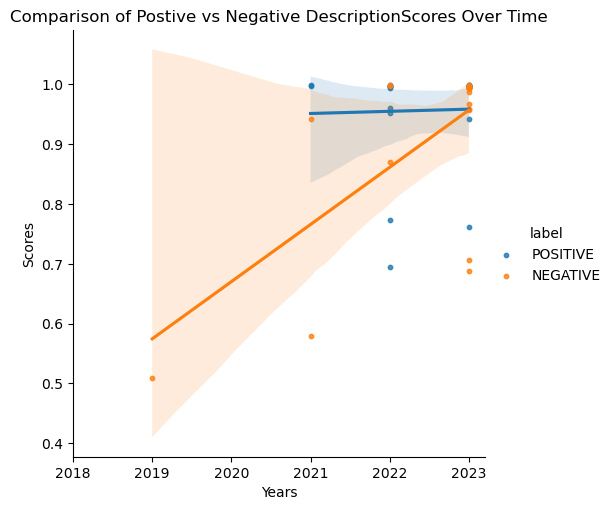

In [48]:
sns.lmplot(data=df_merged, x="date", y="score", hue="label", scatter_kws={"s": 10}, height=5)
plt.xticks(np.arange(2018, 2024, 1))
plt.title('Comparison of Postive vs Negative DescriptionScores Over Time')
plt.xlabel('Years')
plt.ylabel('Scores')
plt.show()

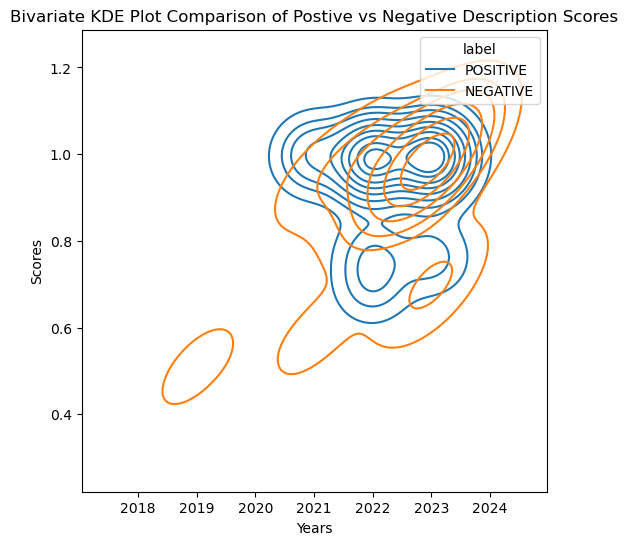

In [49]:
plt.figure(figsize=(6,6))
sns.kdeplot(data=df_merged, x="date", y="score", hue="label")
plt.title("Bivariate KDE Plot Comparison of Postive vs Negative Description Scores")
plt.xlabel('Years')
plt.ylabel('Scores')
plt.show()

## Finding
1. With the current model, almost all descriptions have farily high possibility to have either negative or positive connotations (most are above 0.7), indicating the extreme emotions behind the descriptions.
2. There appears more negative descriptions as time goes by.
3. Ignoring the data without "year" would cause huge difference to the final training result. There are more positive reviews than negative ones in the overall google contents, but the opposite takes place considering the "year" of each content. This could suggest that there are more negative opinions in more authoritative sources in recent years.   

## Some Statistical Bias/Inconsistency & What can be done Better?
1. Excluding data without specific 'year' gives fairly different conclusions than the other data set.
2. Different data training models yield different results and intepretations. 
3. Limitations, such as data sources and sampling size, should be considered.
4. More modeling can be used on the same data to verify the intepretations.
5. Deeper analyses shall be implemented, such as using regression line to prove the correlation.
6. Use more intelligent functions and apply them to specific data sets, instead of repeating steps manually.

## Conclusion
1. The increasing number of processed regulations on electric vehicles promotes the sales and overall number of electric vehicles in the US, which implies that governmental policies enhances public opinions; in the other hand, a decrease number of processed regulations result in a decrease in sales, which may imply negative impressions but would not affect the overall sales in the world.
2. The public usually holds a good anticipation for electric vehicles.
3. No matter what model to use, almost all public views hold slightly positive sentiments towards electric vehicles.
4. However, there is an increasing trend of negative views that grows faster than the positive ones towards the topic throughout years.
5. In addition, most negative views are from authoritative sources.
6. No matter how many negative views are in public, the number of electric vehicles would inevitably increase in US and the whole world.